# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint


%matplotlib inline

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
# Lets check out the data set first

print(train.keys())
print(train['__header__'])
print(train['__version__'])
print(train['__globals__'])
print("\n*********  X\n", train['X'])
print("\n*********  Y\n", train['y'])



dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011'
1.0
[]

*********  X
 [[[[ 33  84  19 ...  92 190 216]
   [ 30  76  54 ...  78 188 217]
   [ 38  59 110 ... 101 191 212]]

  [[ 15  86  20 ...  94 205 221]
   [ 23  73  52 ...  82 203 222]
   [ 19  66 111 ... 105 206 217]]

  [[ 15  77  25 ... 114 220 226]
   [ 17  78  57 ... 101 218 227]
   [ 19  56 116 ... 125 220 221]]

  ...

  [[ 72  90  65 ... 200 229 200]
   [ 65  78 144 ... 201 231 199]
   [ 56  69 223 ... 203 224 191]]

  [[ 82  88  78 ... 192 229 193]
   [ 77  77 148 ... 193 229 188]
   [ 57  67 218 ... 195 224 182]]

  [[ 89  88  98 ... 190 229 197]
   [ 79  78 158 ... 191 228 189]
   [ 59  66 220 ... 193 223 186]]]


 [[[ 28  85  21 ...  92 183 204]
   [ 39  77  53 ...  78 182 205]
   [ 35  61 110 ... 103 186 202]]

  [[ 14  83  19 ...  93 200 210]
   [ 25  73  52 ...  80 199 211]
   [ 22  64 106 ... 106 201 208]]

  [[ 14  74  25

In [4]:
#Let's not extract the images and the labels from both the train and test dictionaries and normalize

train_x = train['X']
train_y = train['y']
test_x= test['X']
test_y = test['y']

print("Shape of Training Data: ", train_x.shape)
print("Shape of Test Data: ", train_x.shape)
print("Shape of Training Lables: ", train_y.shape)
print("Shape of Test Lables: ", test_y.shape)

print("\nData at train_y[1]:",train_y[1])
print("\nData at train_x[1]:\n",train_x[1])



Shape of Training Data:  (32, 32, 3, 73257)
Shape of Test Data:  (32, 32, 3, 73257)
Shape of Training Lables:  (73257, 1)
Shape of Test Lables:  (26032, 1)

Data at train_y[1]: [9]

Data at train_x[1]:
 [[[ 28  85  21 ...  92 183 204]
  [ 39  77  53 ...  78 182 205]
  [ 35  61 110 ... 103 186 202]]

 [[ 14  83  19 ...  93 200 210]
  [ 25  73  52 ...  80 199 211]
  [ 22  64 106 ... 106 201 208]]

 [[ 14  74  25 ... 111 218 220]
  [ 20  69  56 ...  98 217 221]
  [ 17  59 111 ... 124 218 217]]

 ...

 [[ 40  89  63 ... 181 227 201]
  [ 39  82 137 ... 180 228 199]
  [ 50  64 208 ... 184 223 193]]

 [[ 67  88  91 ... 177 227 195]
  [ 58  79 153 ... 176 226 191]
  [ 52  70 214 ... 180 222 186]]

 [[ 83  88 130 ... 183 228 196]
  [ 78  81 180 ... 182 224 190]
  [ 60  67 229 ... 187 221 186]]]


In [5]:
print("Unique Training Labels: ", np.unique(train_y))
print("Unique Test Labels: ", np.unique(test_y))


Unique Training Labels:  [ 1  2  3  4  5  6  7  8  9 10]
Unique Test Labels:  [ 1  2  3  4  5  6  7  8  9 10]


In [6]:
train_y[train_y == 10] = 0
test_y[test_y == 10] = 0
print("Unique Training Labels: ", np.unique(train_y))
print("Unique Test Labels: ", np.unique(test_y))
print("train_y [2]: " , train_y[2600])
print("train_y [2]: " , train_y[600])

Unique Training Labels:  [0 1 2 3 4 5 6 7 8 9]
Unique Test Labels:  [0 1 2 3 4 5 6 7 8 9]
train_y [2]:  [1]
train_y [2]:  [7]


In [7]:
train_x_std = train_x/255.
test_x_std = test_x/255.


In [8]:
train_x_std = np.moveaxis(train_x_std, -1, 0)
test_x_std = np.moveaxis(test_x_std, -1, 0)
print("Shape of Training Data: ", train_x_std.shape)
print("Shape of Test Data: ", test_x_std.shape)
print("Shape of Training Lables: ", train_y.shape)
print("Shape of Test Lables: ", test_y.shape)

Shape of Training Data:  (73257, 32, 32, 3)
Shape of Test Data:  (26032, 32, 32, 3)
Shape of Training Lables:  (73257, 1)
Shape of Test Lables:  (26032, 1)


In [9]:
train_x_std

array([[[[0.12941176, 0.11764706, 0.14901961],
         [0.05882353, 0.09019608, 0.0745098 ],
         [0.05882353, 0.06666667, 0.0745098 ],
         ...,
         [0.28235294, 0.25490196, 0.21960784],
         [0.32156863, 0.30196078, 0.22352941],
         [0.34901961, 0.30980392, 0.23137255]],

        [[0.10980392, 0.15294118, 0.1372549 ],
         [0.05490196, 0.09803922, 0.08627451],
         [0.05490196, 0.07843137, 0.06666667],
         ...,
         [0.15686275, 0.15294118, 0.19607843],
         [0.2627451 , 0.22745098, 0.20392157],
         [0.3254902 , 0.30588235, 0.23529412]],

        [[0.15686275, 0.16078431, 0.14901961],
         [0.07058824, 0.08235294, 0.10196078],
         [0.0627451 , 0.06666667, 0.09019608],
         ...,
         [0.09019608, 0.11372549, 0.17647059],
         [0.1372549 , 0.16470588, 0.17254902],
         [0.28235294, 0.27058824, 0.20784314]],

        ...,

        [[0.3372549 , 0.31764706, 0.29411765],
         [0.34117647, 0.32156863, 0.27843137]

In [10]:
train_x_std = np.mean(train_x_std,keepdims=True,axis = -1)
test_x_std = np.mean(test_x_std,keepdims=True,axis = -1)
print("Shape of Grey Training Data: ", train_x_std.shape)

Shape of Grey Training Data:  (73257, 32, 32, 1)


In [11]:
train_y[train_y == 10] = 0
test_y[test_y == 10] = 0

In [12]:
print("Unique Training Labels: ", np.unique(train_y))
print("Unique Test Labels: ", np.unique(test_y))

Unique Training Labels:  [0 1 2 3 4 5 6 7 8 9]
Unique Test Labels:  [0 1 2 3 4 5 6 7 8 9]


In [13]:
lb = LabelBinarizer()

train_y = lb.fit_transform(train_y)
test_y = lb.fit_transform(test_y)


In [16]:
print("Unique Training Labels: ", np.unique(train_y))
print("Unique Test Labels: ", np.unique(test_y))

Unique Training Labels:  [0 1]
Unique Test Labels:  [0 1]


In [17]:
non_encoded_test_y = lb.inverse_transform(test_y)
non_encoded_train_y = lb.inverse_transform(train_y)

In [18]:
print("Unique Training Labels: ", np.unique(non_encoded_train_y))
print("Unique Test Labels: ", np.unique(non_encoded_test_y))

Unique Training Labels:  [0 1 2 3 4 5 6 7 8 9]
Unique Test Labels:  [0 1 2 3 4 5 6 7 8 9]


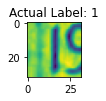

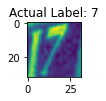

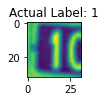

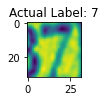

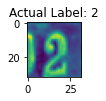

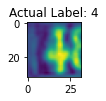

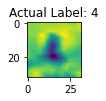

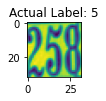

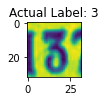

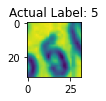

In [19]:
#Lets examine the random 10 images

for i in range(0,10):
    figure, axe = plt.subplots(ncols = 1, nrows =1, figsize=(10, 1))
    random_number = np.random.choice(test_x_std.shape[0])
    axe.imshow(train_x_std[random_number])
    axe.set_title('Actual Label: {}' .format(non_encoded_train_y[random_number]))

 

In [20]:
print (train_x_std.ndim, train_y.ndim, train_x_std[0].shape, train_y[0].shape)

4 2 (32, 32, 1) (10,)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

# Regularized MLP model with Callbacks

In [21]:
#checkpoint_path = 'model_checkpoints/checkpoint_{epoch:02d}'
! rm -r model_checkpoints
checkpoint_path = 'model_checkpoints/checkpoint'

checkpoint_val_per_epoch = ModelCheckpoint(filepath = checkpoint_path,
                            frequency = 'epoch',
                            monitor = 'val_loss',
                            save_best_only = True,
                            save_weights_only = True,
                            verbose = 1)

In [22]:
def get_mlp_regularized_model(wd, input_shape):
    
    model = Sequential([
    Flatten(input_shape = input_shape),
    Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu', name = 'layer_1'),
    Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu', name = 'layer_2'),
    Dense(128, kernel_regularizer = regularizers.l2(wd), activation = 'relu', name = 'layer_3'),
    Dense(10, activation = 'softmax'),
    ])
    return model

    

In [23]:
MLP_reg_model = get_mlp_regularized_model(1e-5, train_x_std[0].shape)

MLP_reg_model.summary()

MLP_reg_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

reduceLRonPlateau_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", 
                                                                  factor = 0.2, patience = 3, 
                                                                  verbose = 1)

MLP_reg_history = MLP_reg_model.fit(x=train_x_std, y=train_y, epochs = 30, 
                            validation_split=0.15, batch_size=64,
                            callbacks = [checkpoint_val_per_epoch, reduceLRonPlateau_callback],
                            verbose = False )



2022-05-22 17:32:40.916370: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-22 17:32:40.916756: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
layer_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
layer_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 165,514
Trainable params: 165,514
Non-trainable params: 0
_________________________________________________________________

Epoch 00001: val_loss improved from inf to 1.48287, saving model to model_checkpoints/checkpoint

Epoch 00002: val_

In [24]:
! ls -lh model_checkpoints/

total 3904
-rw-r--r--  1 moni  staff    77B May 22 17:36 checkpoint
-rw-r--r--  1 moni  staff   1.9M May 22 17:36 checkpoint.data-00000-of-00001
-rw-r--r--  1 moni  staff   2.0K May 22 17:36 checkpoint.index


In [25]:
MLP_reg_model.evaluate(test_x_std, test_y, verbose = 2)

26032/1 - 2s - loss: 0.9941 - accuracy: 0.7295


[0.884822539266224, 0.7295252]

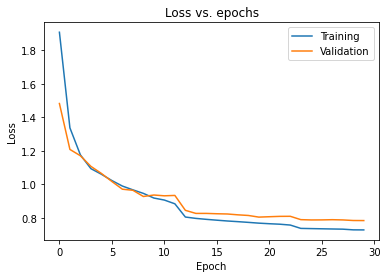

In [26]:
plt.plot(MLP_reg_history.history['loss'])
plt.plot(MLP_reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

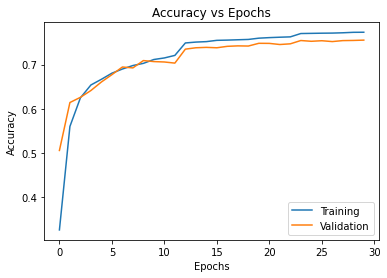

In [27]:
plt.plot(MLP_reg_history.history['accuracy'])
plt.plot(MLP_reg_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'lower right')

0


array([[0.31552488, 0.11892834, 0.03276519, 0.22020902, 0.08404231,
        0.08155134, 0.03576181, 0.00647927, 0.0232967 , 0.0814411 ]],
      dtype=float32)

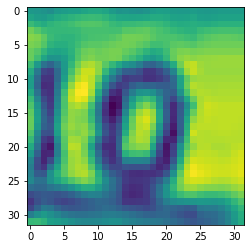

In [28]:
plt.imshow(test_x_std[3])
prediction = MLP_reg_model.predict(test_x_std[np.newaxis, 3])
print(np.argmax(prediction))
prediction

3


array([[1.05067345e-04, 7.70687219e-03, 1.12163741e-02, 7.79664874e-01,
        3.74978408e-03, 1.45806253e-01, 5.92956145e-04, 5.81146684e-04,
        2.01668944e-02, 3.04097552e-02]], dtype=float32)

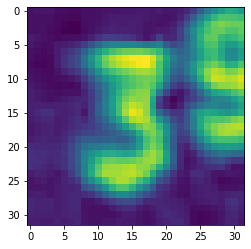

In [29]:
plt.imshow(test_x_std[769])
prediction = MLP_reg_model.predict(test_x_std[np.newaxis, 769])
print(np.argmax(prediction))
prediction

Prediction:  0


array([[9.6230423e-01, 1.7757786e-03, 2.0593952e-03, 1.2357580e-03,
        2.0822929e-03, 1.0418070e-03, 1.1581531e-02, 6.5745774e-04,
        6.2280162e-03, 1.1033708e-02]], dtype=float32)

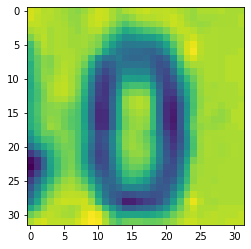

In [30]:
plt.imshow(test_x_std[2349])
prediction = MLP_reg_model.predict(test_x_std[np.newaxis, 2349])
print("Prediction: ", np.argmax(prediction))
prediction

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [31]:
#checkpoint_path = 'model_checkpoints/checkpoint_{epoch:02d}'
! rm -r model_cnn_reg_checkpoints
checkpoint_cnn_reg_path = 'model_reg_checkpoints/checkpoint'

checkpoint_val_reg_per_epoch = ModelCheckpoint(filepath = checkpoint_cnn_reg_path,
                            frequency = 'epoch',
                            monitor = 'val_loss',
                            save_best_only = True,
                            save_weights_only = True,
                            verbose = 1)

rm: model_cnn_reg_checkpoints: No such file or directory


In [32]:
reduceLRonPlateau_cnn_reg_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.2, 
                                                                  patience = 3, verbose = 1)

In [33]:
def get_CNN_reg_model(wd, rate, input_shape):
    model = Sequential([
    Conv2D(filters = 16, input_shape = input_shape, kernel_size = (3, 3), padding = 'SAME', activation='relu', name='conv_1'),
    MaxPooling2D(pool_size=(2, 2), name='pool_1'),
    BatchNormalization(),
    Conv2D(filters = 8, kernel_size = (3, 3), padding = 'SAME', kernel_regularizer = regularizers.l2(wd), activation = 'relu', name = 'conv_2'),
    MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    BatchNormalization(),
    Conv2D(filters = 8, kernel_size = (3, 3), padding = 'SAME', kernel_regularizer = regularizers.l2(wd), activation = 'relu', name = 'conv_3'),
    Flatten(name='flatten'),
    Dense(units=32, activation='relu', name='dense_1'),
    Dropout(rate),
    Dense(units=32, activation='relu', name='dense_2'),
    Dense(units=10, activation='softmax', name='softmax')
    ])
    return model


In [34]:
CNN_reg_model = get_CNN_reg_model(1e-5, 0.4, train_x_std[0].shape)

In [35]:
CNN_reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        160       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 16)        64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 8)         1160      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 8, 8, 8)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 8)           32        
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 8)          

In [36]:
CNN_reg_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [37]:
CNN_reg_history = CNN_reg_model.fit(x=train_x_std, y=train_y, 
                                epochs = 30, 
                                validation_split=0.15, batch_size=64, 
                                callbacks = [ checkpoint_val_reg_per_epoch, reduceLRonPlateau_cnn_reg_callback ],
                                verbose = False )


Epoch 00001: val_loss improved from inf to 0.97863, saving model to model_reg_checkpoints/checkpoint

Epoch 00002: val_loss improved from 0.97863 to 0.67881, saving model to model_reg_checkpoints/checkpoint

Epoch 00003: val_loss improved from 0.67881 to 0.64365, saving model to model_reg_checkpoints/checkpoint

Epoch 00004: val_loss improved from 0.64365 to 0.55008, saving model to model_reg_checkpoints/checkpoint

Epoch 00005: val_loss did not improve from 0.55008

Epoch 00006: val_loss improved from 0.55008 to 0.51227, saving model to model_reg_checkpoints/checkpoint

Epoch 00007: val_loss improved from 0.51227 to 0.50802, saving model to model_reg_checkpoints/checkpoint

Epoch 00008: val_loss did not improve from 0.50802

Epoch 00009: val_loss improved from 0.50802 to 0.50006, saving model to model_reg_checkpoints/checkpoint

Epoch 00010: val_loss improved from 0.50006 to 0.46496, saving model to model_reg_checkpoints/checkpoint

Epoch 00011: val_loss did not improve from 0.46496


In [38]:
CNN_reg_model.evaluate(test_x_std, test_y, verbose = 2)

26032/1 - 7s - loss: 0.4076 - accuracy: 0.8637


[0.4697355834175343, 0.86370623]

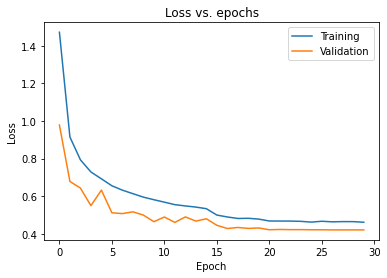

In [39]:
# Plot the training and validation loss

plt.plot(CNN_reg_history.history['loss'])
plt.plot(CNN_reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

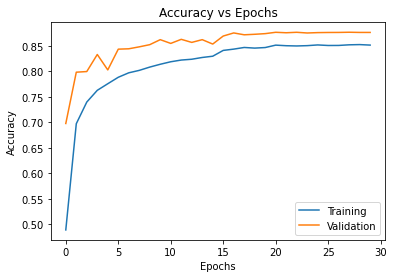

In [40]:
plt.plot(CNN_reg_history.history['accuracy'])
plt.plot(CNN_reg_history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc = 'lower right')

0


array([[0.640227  , 0.02908207, 0.01007334, 0.01061409, 0.00300272,
        0.00406485, 0.1213654 , 0.0096774 , 0.10857343, 0.06331967]],
      dtype=float32)

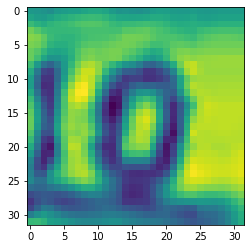

In [41]:
plt.imshow(test_x_std[3])
prediction = CNN_reg_model.predict(test_x_std[np.newaxis, 3])
print(np.argmax(prediction))
prediction

3


array([[4.85487953e-06, 1.02035818e-03, 1.12710826e-04, 9.76971805e-01,
        6.33798263e-05, 2.08731536e-02, 3.09292023e-04, 2.14430620e-04,
        3.19963292e-04, 1.09997345e-04]], dtype=float32)

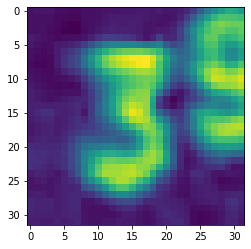

In [42]:
plt.imshow(test_x_std[769])
prediction = CNN_reg_model.predict(test_x_std[np.newaxis, 769])
print(np.argmax(prediction))
prediction

0


array([[9.7721785e-01, 3.9058824e-03, 2.9240371e-04, 1.9991955e-04,
        2.4518691e-05, 6.3414141e-06, 2.2798381e-03, 4.6642619e-04,
        7.4521159e-03, 8.1548002e-03]], dtype=float32)

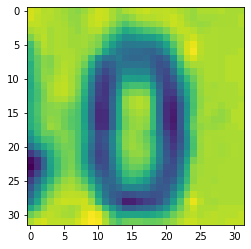

In [43]:
plt.imshow(test_x_std[2349])
prediction = CNN_reg_model.predict(test_x_std[np.newaxis, 2349])
print(np.argmax(prediction))
prediction

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [44]:
print(checkpoint_path)
print(checkpoint_cnn_reg_path)

model_checkpoints/checkpoint
model_reg_checkpoints/checkpoint


In [45]:
# Create a new model and evaluate it without loading the previous checkpoints

reloaded_MLP_reg_model = get_mlp_regularized_model(1e-5, train_x_std[0].shape)
reloaded_MLP_reg_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
reloaded_MLP_reg_model.evaluate(test_x_std, test_y, verbose = 2)


26032/1 - 2s - loss: 2.3342 - accuracy: 0.1167


[2.3113791253864218, 0.116664104]

In [46]:
# Load Best MLP_Reg Model using the 'best' checkpoint we earlier saved 

reloaded_MLP_reg_model.load_weights(checkpoint_path)
reloaded_MLP_reg_model.evaluate(test_x_std, test_y, verbose = 2)

26032/1 - 2s - loss: 0.9941 - accuracy: 0.7295


[0.884822539266224, 0.7295252]

In [47]:

# Create a new model and evaluate it without loading the previous checkpoints

reloaded_CNN_reg_model = get_CNN_reg_model(1e-5, 0.4, train_x_std[0].shape)
reloaded_CNN_reg_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
reloaded_CNN_reg_model.evaluate(test_x_std, test_y, verbose = 2)

26032/1 - 7s - loss: 2.3111 - accuracy: 0.0758


[2.306050506778194, 0.075829744]

In [48]:
# Load Best CNN_Reg Model using the 'best' checkpoint we earlier saved

reloaded_CNN_reg_model.load_weights(checkpoint_cnn_reg_path)
reloaded_CNN_reg_model.evaluate(test_x_std, test_y, verbose = 2)

26032/1 - 7s - loss: 0.4076 - accuracy: 0.8637


[0.4697355834175343, 0.86370623]

In [49]:
# For simplicity we will leave the prediction of 10 to correspond to 0th index

labels = [
    '10',
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9'
]


In [50]:
   
def show_table_of_n_random_data_labels_and_pred_dist(model, model_type, n ):
    

    for i in range(0, n):

        random_index = np.random.choice(test_x_std.shape[0])
        prediction = model.predict(test_x_std[np.newaxis, random_index])
        ht = np.reshape(prediction, (10,))
        fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (10,1))
        ax1.imshow(test_x_std[random_index])
        ax1.set_title('Actual Label: {}' .format(non_encoded_test_y[random_index]))
        ax2.bar(range(0,10), height = ht)
        ax2.set_title('Prediction: {} from {} Prediction Distribution' .format(np.argmax(ht), model_type))
        plt.show()
        
   

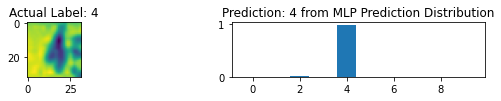

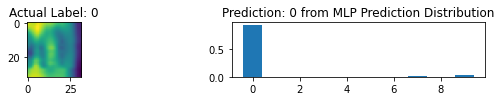

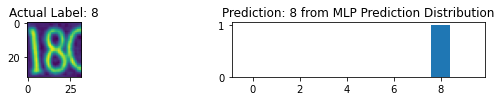

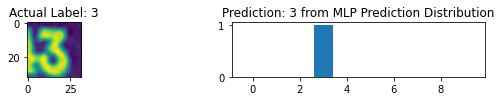

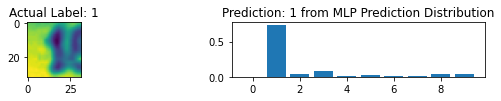

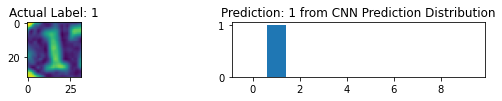

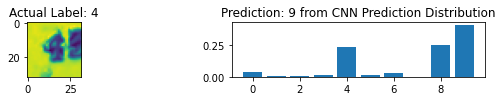

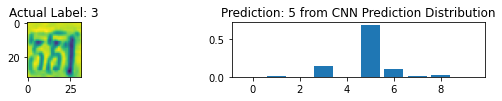

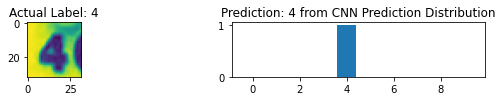

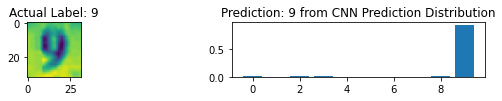

In [52]:
show_table_of_n_random_data_labels_and_pred_dist(MLP_reg_model, "MLP", 5)
show_table_of_n_random_data_labels_and_pred_dist(CNN_reg_model, "CNN", 5)
